In [1]:
import pandas as pd

Combining three dataframes

In [2]:
df = pd.read_csv("gpa_ds.csv")

In [3]:
courses = pd.read_csv('courses.csv')
demo = pd.read_csv('demographics.csv')

/Users/jaeheukjung/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,3,4,5,6,7,8,9,12,13,14,17,18,19,21,22,23,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/jaeheukjung/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (37,43,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
courses = courses.loc[courses["SubjectID"]>0]
demo = demo.loc[demo['SubjectID']>0]
df = df.loc[df['SubjectID']>0]

Dropping columns by common sense

In [24]:
courses.columns

Index(['SubjectID', 'Year Term ID', 'Ps1 Timestat Code', 'Ps1 Ofcl Stat Flag',
       'Ps1 Major1 Code', 'Ps1 Major2 Code', 'Ps2 Ofcl Stat Flag',
       'Ps2 Major1 Code', 'Ps2 Major2 Code', 'Ps1 Class Code', 'CRN',
       'College Code', 'Subject Code', 'Course No', 'Course Discipline Code',
       'Parent CRN', 'Parent College Code', 'Parent Subject Code',
       'Parent Course No', 'Parent Discipline Code', 'Credit Hrs',
       'Repeated Flag', 'Reg Status Desc', 'Grade', 'Grade Value',
       'Reported Grade', 'Ps1 Enroll Status Desc', 'Ps1 Withdraw Code',
       'Ps1 Withdraw Reason', 'Dorm Area', 'Ps1 Acad Standing Desc'],
      dtype='object')

In [5]:
courses = courses.drop( ['Ps1 Class Code', 'CRN',
       'College Code', 'Subject Code', 'Course No', 'Course Discipline Code',
       'Parent CRN', 'Parent College Code', 'Parent Subject Code',
       'Parent Course No', 'Parent Discipline Code'], axis = 1)

In [6]:
courses= courses.drop(['Reg Status Desc', 'Grade Value','Ps1 Enroll Status Desc', 'Ps1 Withdraw Code',
       'Ps1 Withdraw Reason'], axis = 1)

In [7]:
demo = demo.drop(['Visa Code', 'Visa Desc', 'Citizen Type',
       'Citizen Country Code',
       '2010 IPEDS Ethnicity Description', '2010 Ethnicity Short Desc',
       'Veteran Status Desc', 'HS State Prov',
       'HS Postal Code', 'HS Country', 'HS Rank', 'HS Size',
       'HS Graduation Date', 'SAT Verbal', 'SAT Math', 'SAT Writing','ACT English', 'ACT Math', 'ACT Soc Science',
       'ACT Nat Science','B - Type Desc', 'B - Class Year',
       'B - Time Status Code', 'B - Degree Code', 'B - Major1 Code',
       'B - Major2 Code', 'B - Response Code', 'B - Response Desc',
       'B - Response Date', 'B - Action Code', 'B - Action Desc',
       'B - Action Date', 'B - Transfer College Code',
       'B - Transfer College Name', 'B - Transfer GPA',
       'B - Graduated College Name', 'Und Cohort First YT', # B = admissions
       'Transfer Year Term', 'Cohort Major1 Disc Code',
       'Cohort Major1 Dept Code', 'Cohort Major1 Code',
       'Cohort Major2 Disc Code', 'Cohort Major2 Dept Code', # cohort = census 
       'Cohort Major2 Code', 'Degree Code', 'Degree Class Year',
       'Degree Major1 Discipline Code', 'Degree Major1 Dept Code',
       'Degree Major1 Code', 'Degree Major2 Discipline Code',
       'Degree Major2 Dept Code', 'Degree Major2 Code', 'Degree Minor1 Code',
       'Degree Minor2 Code', 'Degree Minor3 Code', 'Clust1 Code',
       'Clust1 Dept Code', 'Clust2 Code', 'Clust2 Dept Code',
       'Degree Honors Code'] , axis = 1)

In [8]:
dataframe = pd.merge(df, courses, on='SubjectID')

In [9]:
dataframe = pd.merge(dataframe, demo, on='SubjectID')

Merged Dataframes

In [15]:
dataframe.columns

Index(['SubjectID', 'Year Term ID_x', 'Term GPA', 'Term Hrs Earned',
       'Term Hrs GPA', 'Term Points Earned', 'Cumul GPA', 'Cumul Hrs Earned',
       'Cumul Hrs GPA', 'Cumul Points Earned', 'Term Transfer Hrs',
       'Year Term ID_y', 'Ps1 Timestat Code', 'Ps1 Ofcl Stat Flag',
       'Ps1 Major1 Code', 'Ps1 Major2 Code', 'Ps2 Ofcl Stat Flag',
       'Ps2 Major1 Code', 'Ps2 Major2 Code', 'Credit Hrs', 'Repeated Flag',
       'Grade', 'Reported Grade', 'Dorm Area', 'Ps1 Acad Standing Desc',
       'Gender', 'Citizen Country Name', 'First Generation Flag', 'Birthdate',
       'HS City', 'SAT Total', 'ACT Composite', 'Degree Award Date',
       'Degree Confer Date'],
      dtype='object')

In [16]:
dataframe = dataframe.drop_duplicates()

In [ ]:
freshmen_gpa = {}

In [ ]:
dataframe_heatmap['Ps1 Ofcl Stat Flag'].value_counts()

Retrieving the first semester GPAs 

In [ ]:
for i in dataframe['SubjectID'].unique():
    x = dataframe.loc[dataframe['SubjectID']==i]
    freshmen_gpa.update({i: x['Cumul GPA'].iloc[0]})

low freshmen = lower than 2 gpa on first semester
one freshmen = lower than 1 gpa on first semester

In [ ]:
low_freshmen = []
One_freshmen = []
for i,j in freshmen_gpa.items():
    if(j<2.0):
        low_freshmen.append(i)
    if(j<1.0):
        One_freshmen.append(i)

In [ ]:
count = 0
count_1 = 0
for x in non_graduate['SubjectID'].unique():
    if(x in low_freshmen):
        count = count+1
    if(x in One_freshmen):
        count_1= count_1+1
print(count)
print(count_1)

In [18]:
279/293 # 95 % of the students who got below 1.0 on first semester did not graduate

0.9522184300341296

In [19]:
587/848 # 70 % of the students who were below 2.0 in freshmen year/ first semester did not graduate

0.6922169811320755

Retrieving the dataset for students who graduated and did not graduate by degree confer date

In [10]:
graduated = dataframe.loc[dataframe['Degree Confer Date'].isnull()==False]
non_graduate = dataframe.loc[dataframe['Degree Confer Date'].isnull()==True]

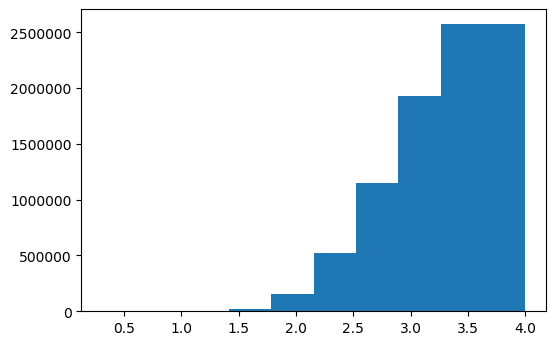

In [14]:
import matplotlib.pyplot as plt
plt.figure(dpi= 100)
plt.hist(graduated['Cumul GPA'])
plt.show()

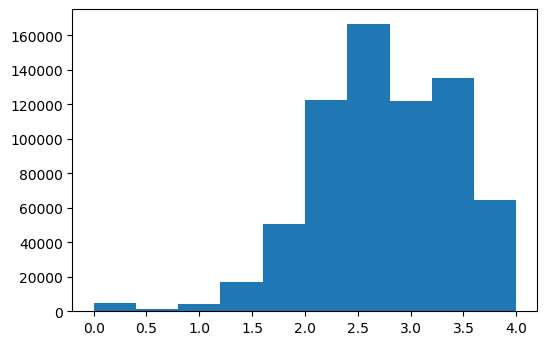

In [17]:
plt.figure(dpi =100)
plt.hist(non_graduate['Cumul GPA'])
plt.show()

In [21]:
count = 0 
non_grad_dict = {}
def gpa_dict(df, col1, col2, dictionary): #gets the final GPAs of the students. Insert dataframe
    for i in df[col].unique():
        count = count+1
        perc = count/len(df[col].unique())
        if(perc>.10==0):
            print(perc)
            count = 0
        x = df.loc[df[col]==i]
        dictionary.update({i: x[col2].iloc[len(x)-1]})

In [26]:
import numpy as np

checking if first generation flag has high correlation

In [ ]:
non_graduate['First Generation Flag'].value_counts(normalize = True)

In [ ]:
graduated['First Generation Flag'].value_counts(normalize = True)

In [ ]:
non_graduate = non_graduate.drop(['Year Term ID_y', 'Cumul Points Earned', 'Term Transfer Hrs'], axis = 1)

Printing data in order to have general idea of which columns show difference between non graduate and graduate group

In [31]:
for i in graduated.select_dtypes(include=[object]):
    print(i)
    print('graduated')
    print(graduated[i].value_counts(normalize = True))
    print('non graduate')
    print(non_graduate[i].value_counts(normalize = True))

Ps1 Timestat Code
graduated
F    0.975001
P    0.013937
X    0.011062
Name: Ps1 Timestat Code, dtype: float64
non graduate
F    0.877803
X    0.090714
P    0.031483
Name: Ps1 Timestat Code, dtype: float64
Ps1 Ofcl Stat Flag
graduated
Y    0.602773
N    0.397227
Name: Ps1 Ofcl Stat Flag, dtype: float64
non graduate
N    0.648873
Y    0.351127
Name: Ps1 Ofcl Stat Flag, dtype: float64
Ps1 Major1 Code
graduated
BIO    0.079637
PSY    0.072475
UNC    0.064885
ECO    0.059736
PSC    0.048726
         ...   
ECW    0.000030
GSC    0.000018
EMC    0.000012
FL     0.000012
PH     0.000007
Name: Ps1 Major1 Code, Length: 98, dtype: float64
non graduate
UNC    0.125215
BIO    0.106724
PSC    0.056441
PSY    0.050670
ECO    0.048731
         ...   
EBA    0.000218
CSA    0.000196
BEN    0.000189
CL     0.000163
SOC    0.000131
Name: Ps1 Major1 Code, Length: 88, dtype: float64
Ps1 Major2 Code
graduated
.      0.916741
PSY    0.007849
AMU    0.007513
ECO    0.006535
PSC    0.005987
         ...   
ES

Checking general numbers of students

In [32]:
len(dataframe['SubjectID'].unique())

20387

In [33]:
len(courses['SubjectID'].unique())

20879

In [34]:
len(demo ['SubjectID'].unique())

21921

In [ ]:
test_value_list = test['SubjectID'].value_counts().to_dict()

In [ ]:
value_list = {}

In [ ]:
value_list = df['SubjectID'].value_counts().to_dict()

In [ ]:
value_list

In [ ]:
plt.hist(value_list.values())

Process of classifying the student groups

In [ ]:
for i,j in value_list.items():
    if(j>12):
        longer.append(i)

In [ ]:
for i,j in test_value_list.items():
    if(j>8):
        test_longer.append(i)

In [ ]:
df['classification'] = False

In [ ]:
df['classification'].value_counts()

In [ ]:
df.loc[df["SubjectID"].isin(longer), 'classification'] = True

In [ ]:
df['classification'].value_counts()

In [ ]:
longer_students = df.loc[df['classification']==True]

In [ ]:
normal_students= df.loc[df['classification']==False]

In [ ]:
longer_students.columns

Finding out the gpa difference between the normal students and students who take longer

In [ ]:
ls_gpa = []
ns_gpa = []

In [ ]:
len(longer_students)

In [ ]:
len(graduated['SubjectID'].unique())

In [ ]:
len(non_graduate['SubjectID'].unique())

In [ ]:
for i in range(0,len(longer_students['SubjectID'])-1):
    if (longer_students['SubjectID'].iloc[i]!=longer_students['SubjectID'].iloc[i+1]):
        ls_gpa.append(longer_students['Cumul GPA'].iloc[i])

In [ ]:
for i in range(0,len(normal_students['SubjectID'])-1):
    if (normal_students['SubjectID'].iloc[i]!=normal_students['SubjectID'].iloc[i+1]):
        ns_gpa.append(normal_students['Cumul GPA'].iloc[i])

In [ ]:
np.mean(ls_gpa)

In [ ]:
np.mean(ns_gpa)

In [ ]:
np.median(ns_gpa)

In [ ]:
np.median(ls_gpa)

In [ ]:
halfstd =np.std(all_gpa)/2

In [ ]:
halfstd

Classifying the Groups 

In [ ]:
classified_dataframe = dataframe.copy()

In [ ]:
classified_dataframe = classified_dataframe.drop(['First Generation Flag', 'Birthdate','Term Hrs Earned',
       'Term Hrs GPA', 'Term Points Earned','Ps1 Ofcl Stat Flag', 'Cumul Points Earned'], axis =1)

In [ ]:
classified_dataframe['Classification']= ' '

In [ ]:
notgrad = non_graduate['SubjectID'].unique()

Used this for classified dataframe ( which includes the summer semester as one course, thus changing the classification of the students) and df_drop_summer. There was a significant difference between the percentage of classification groups, such as the number of normal students decreaseing to 50% range. 

In [ ]:
normal_dropped = []
nine_plus_dropped= []
tw_plus_dropped = []
count = 0
for i in df_drop_summer['SubjectID'].unique():
    count= count+1
    if(count/len(df_drop_summer['SubjectID'].unique())>.1):
        print('10%')
        count=0
    x= df_drop_summer.loc[df_drop_summer['SubjectID']==i]
    if(len(x['Year Term ID_x'].unique())<=8):
        normal_dropped.append(i)
    elif(len(x['Year Term ID_x'].unique())>=9 and len(x['Year Term ID_x'].unique())<13):
        nine_plus_dropped.append(i)
    elif(len(x['Year Term ID_x'].unique())>=13):
        tw_plus_dropped.append(i)

In [ ]:
classified_dataframe.loc[classified_dataframe["SubjectID"].isin(normal), 'Classification'] = 4
classified_dataframe.loc[classified_dataframe["SubjectID"].isin(nine_twelve), 'Classification'] = 3
classified_dataframe.loc[classified_dataframe["SubjectID"].isin(twelve_plus), 'Classification'] = 2
classified_dataframe.loc[classified_dataframe["SubjectID"].isin(notgrad), 'Classification'] = 1

The plottings are archived

In [ ]:
labels = 'Normal', '9-12', '13+', 'Non Graduate'
sizes = [15079, 2463, 123, 2724]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.3, 0, 0, 0)  # explode 1st slice

# Plot
plt.figure(dpi = 150)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Students breakdown not counting summer')
plt.show()

In [ ]:
labels = 'Normal', '9-12', '13+', 'Non Graduate'
sizes = [11267, 6058, 340, 2724]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.3, 0, 0, 0)  # explode 1st slice

# Plot
plt.figure(dpi = 150)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Students breakdown counting summer')
plt.show()

Making df_drop_summer dataframe. This is the main dataframe that is going to be used in the future

In [ ]:
year_Term = []

In [ ]:
for i in classified_dataframe['Year Term ID_x'].unique():
    year_Term.append(str(i))

In [ ]:
summer = []

In [ ]:
for i in year_Term:
    if(i[4]=='4'):
        summer.append(float(i))

In [ ]:
df_drop_summer = classified_dataframe.loc[~classified_dataframe['Year Term ID_x'].isin(summer)]

In [ ]:
df_drop_summer.groupby(['Classification']).median()

In [ ]:
df_drop_summer.loc[df_drop_summer["SubjectID"].isin(normal_dropped), 'Classification'] = 4
df_drop_summer.loc[df_drop_summer["SubjectID"].isin(nine_plus_dropped), 'Classification'] = 3
df_drop_summer.loc[df_drop_summer["SubjectID"].isin(tw_plus_dropped), 'Classification'] = 2
df_drop_summer.loc[df_drop_summer["SubjectID"].isin(notgrad), 'Classification'] = 1

In [ ]:
len(df_drop_summer["SubjectID"].unique())
print(len(normal_dropped))
print(len(nine_plus_dropped))
print(len(tw_plus_dropped))
print(len(notgrad))
print(len(graduated['SubjectID'].unique()))
print(len(df_drop_summer['SubjectID'].unique()))

saving dataframe for distribution

In [ ]:
classified_dataframe.to_csv('classified_dataframe')

In [ ]:
Normal = classified_dataframe.loc[classified_dataframe['Classification']=='N']
NineTwelve = classified_dataframe.loc[classified_dataframe['Classification']=='NT']
TwelvePlus = classified_dataframe.loc[classified_dataframe['Classification']=='TP']
NonGrad = classified_dataframe.loc[classified_dataframe['Classification']=='NG']

Dividing the dataframes for analysis

In [ ]:
classified_dataframe = classified_dataframe.drop(['classification'], axis = 1)

In [ ]:
Normal_lowfresh = Normal.loc[Normal['SubjectID'].isin(low_freshmen)]

In [ ]:
NineTwelve_lowfresh = NineTwelve.loc[NineTwelve['SubjectID'].isin(low_freshmen)]
TwelvePlus_lowfresh = TwelvePlus.loc[TwelvePlus['SubjectID'].isin(low_freshmen)]
NonGrad_lowfresh = NonGrad.loc[NonGrad['SubjectID'].isin(low_freshmen)]

In [ ]:
Normal_Onefresh = Normal.loc[Normal['SubjectID'].isin(One_freshmen)]
NineTwelve_Onefresh = NineTwelve.loc[NineTwelve['SubjectID'].isin(One_freshmen)]
TwelvePlus_Onefresh = TwelvePlus.loc[TwelvePlus['SubjectID'].isin(One_freshmen)]
NonGrad_Onefresh = NonGrad.loc[NonGrad['SubjectID'].isin(One_freshmen)]

In [ ]:
len(Normal_lowfresh['SubjectID'].unique())

In [ ]:
print(len(NineTwelve_lowfresh['SubjectID'].unique()))
print(len(TwelvePlus_lowfresh['SubjectID'].unique()))
print(len(NonGrad_lowfresh['SubjectID'].unique()))

In [ ]:
labels = 'Normal', '9-12', '13+', 'Non Graduate'
sizes = [7, 5, 5, 276]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0, 0.1)  # explode 1st slice

# Plot
plt.figure(dpi = 150)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Students with less than 1.0 gpa first semester break down')
plt.show()

In [ ]:
print(len(Normal_Onefresh['SubjectID'].unique()))
print(len(NineTwelve_Onefresh['SubjectID'].unique()))
print(len(TwelvePlus_Onefresh['SubjectID'].unique()))
print(len(NonGrad_Onefresh['SubjectID'].unique()))

In [ ]:
print(len(Normal_lowfresh['SubjectID'].unique())/len(Normal['SubjectID'].unique()))
print(len(NineTwelve_lowfresh['SubjectID'].unique())/len(NineTwelve['SubjectID'].unique()))
print(len(TwelvePlus_lowfresh['SubjectID'].unique())/len(TwelvePlus['SubjectID'].unique()))
print(len(NonGrad_lowfresh['SubjectID'].unique())/len(NonGrad['SubjectID'].unique()))

In [ ]:
122+138+32+556

In [ ]:
labels = 'Normal', '9-12', '13+', 'Non Graduate'
sizes = [122, 138, 32, 556]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0, 0.1)  # explode 1st slice

# Plot
plt.figure(dpi = 150)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Students with less than 2.0 gpa first semester break down')
plt.show() #summer into consideration

In [ ]:
print(122/848) #normal
print(138/848) #nineTwelve
print(32/848) #TwelvePlus
print(556/848) #nongrad. It can be guessed that if the person with low freshmen grade does not graduate
#within 6 years, the person is going to not graduate at all. 

Custom Labeling 

In [ ]:
classified_dataframe.loc[classified_dataframe['Degree A ward Date'].isnull(), 'Degree Award Date']=0
classified_dataframe.loc[classified_dataframe['Degree Award Date'].isnull()==False, 'Degree Award Date']=1

In [ ]:
classified_dataframe.loc[classified_dataframe['Degree Confer Date'].isnull(), 'Degree Confer Date']=0
classified_dataframe.loc[classified_dataframe['Degree Confer Date'].isnull()==False, 'Degree Confer Date']=1

In [ ]:
classified_dataframe['Degree Award Date']=dataframe['Degree Award Date']
classified_dataframe['Degree Confer Date']=dataframe['Degree Confer Date']

In [ ]:
classified_dataframe['Degree Award Date'].isnull().sum()

In [ ]:
classified_dataframe.corr()

In [ ]:
le.inverse_transform(classified_dataframe['Classification'])

In [ ]:
critical_semester = classified_dataframe.loc[classified_dataframe['Term GPA']<1]

In [ ]:
crit = critical_semester['SubjectID'].unique()

In [ ]:
count = 0
for i in crit:
    if(i in graduated['SubjectID'].unique()):
        count = count+1
print(count)

In [ ]:
count = 0
for i in crit:
    if(i in non_graduate['SubjectID'].unique()):
        count = count+1
print(count)

In [ ]:
len(crit)

In [ ]:
5642/7763

saving dataframe for distribution for the team

In [ ]:
df_drop_summer = pd.read_csv("df_drop_summer.csv")

In [ ]:
df_drop_summer.groupby(['Classification']).median()

In [ ]:
df_drop_summer.groupby('SubjectID')

creating dataframes for each groups (df_drop_summerm)

In [ ]:
major_dics = df_drop_summer['Ps1 Major1 Code'].value_counts().to_dict()
example = pd.DataFrame(data=major_dics, index=[0])
example.to_excel('majors.xlsx')

In [ ]:
normal_df= df_drop_summer.loc[df_drop_summer['Classification']==4]
major_dics_normal = normal_df['Ps1 Major1 Code'].value_counts().to_dict()
normal_major = pd.DataFrame(data = major_dics_normal, index = [0])
normal_major.to_excel('normal_majors.xlsx')

In [ ]:
ntw_df= df_drop_summer.loc[df_drop_summer['Classification']==3]
major_dics_ntw = ntw_df['Ps1 Major1 Code'].value_counts().to_dict()
ntw_major = pd.DataFrame(data = major_dics_ntw, index = [0])
ntw_major.to_excel('ntw_majors.xlsx')

In [ ]:
ttp_df= df_drop_summer.loc[df_drop_summer['Classification']==2]
major_dics_ttp = ttp_df['Ps1 Major1 Code'].value_counts().to_dict()
ttp_major = pd.DataFrame(data = major_dics_ttp, index = [0])
ttp_major.to_excel('ttp_majors.xlsx')

In [ ]:
ng_df= df_drop_summer.loc[df_drop_summer['Classification']==1]
major_dics_ng = ng_df['Ps1 Major1 Code'].value_counts().to_dict()
ng_major = pd.DataFrame(data = major_dics_ng, index = [0])
ng_major.to_excel('ng_majors.xlsx')

In [ ]:
df_drop_summer['Classification'].value_counts()

In [ ]:
df_drop_summer.corr()

In [ ]:
len(df['SubjectID'].unique())

Trying to check the number of students who had less than 1 gpa for two consequtive semesters

In [ ]:
consequtive = []
for i in df['SubjectID'].unique():
    x = df.loc[df['SubjectID']==i]
    for j in range(0, len(x['Term GPA'])-1):
        a = x['Term GPA'].iloc[j]
        b = x['Term GPA'].iloc[j+1]
        c = x['Term Hrs Earned'].iloc[j]
        d = x['Term Hrs Earned'].iloc[j+1]
        if(a<1 and b<1):
            consequtive.append(i)

In [ ]:
for i in consequtive:
    x = df.loc[df['SubjectID']==i]
    if(len(x)>16):
        consequtive.remove(i)

In [ ]:
for i in consequtive:
    if(i in normal):
        consequtive.remove(i)

In [ ]:
consequtive= set(consequtive)

In [ ]:
len(consequtive)

Custom Labeling for preparation of machine learning

In [ ]:
df_drop_summer.loc[df_drop_summer['Degree Confer Date'].isnull(), 'Degree Confer Date']=0
df_drop_summer.loc[df_drop_summer['Degree Confer Date'].isnull()==False, 'Degree Confer Date']=1
df_drop_summer.loc[df_drop_summer['Degree Award Date'].isnull(), 'Degree Award Date']=0
df_drop_summer.loc[df_drop_summer['Degree Award Date'].isnull()==False, 'Degree Award Date']=1

In [ ]:
df_drop_summer.loc[df_drop_summer['Ps1 Major2 Code']=='.', 'Ps1 Major2 Code']=0
df_drop_summer.loc[df_drop_summer['Ps1 Major2 Code']!='.', 'Ps1 Major2 Code']=1

In [ ]:
df_drop_summer.loc[df_drop_summer['Ps2 Major2 Code']=='.', 'Ps2 Major2 Code']=0
df_drop_summer.loc[df_drop_summer['Ps2 Major2 Code']!='.', 'Ps2 Major2 Code']=1

In [ ]:
df_drop_summer.loc[df_drop_summer['Ps2 Major1 Code']=='.', 'Ps2 Major1 Code']=0
df_drop_summer.loc[df_drop_summer['Ps2 Major1 Code']!='.', 'Ps2 Major1 Code']=1

In [ ]:
df_drop_summer.loc[df_drop_summer['Dorm Area']=='.', 'Dorm Area']=0
df_drop_summer.loc[df_drop_summer['Dorm Area']!='.', 'Dorm Area']=1

In [ ]:
df_drop_summer.loc[df_drop_summer['Citizen Country Name']=='USA', 'Citizen Country Name']=0
df_drop_summer.loc[df_drop_summer['Citizen Country Name']!='USA', 'Citizen Country Name']=1

In [ ]:
df_drop_summer.loc[df_drop_summer['Ps1 Acad Standing Desc']=='ACTIVE', 'Ps1 Acad Standing Desc']=1
df_drop_summer.loc[df_drop_summer['Ps1 Acad Standing Desc']!='ACTIVE', 'Ps1 Acad Standing Desc']=0

In [ ]:
df_drop_summer.loc[df_drop_summer['Ps2 Ofcl Stat Flag']=='Y', 'Ps2 Ofcl Stat Flag']=1
df_drop_summer.loc[df_drop_summer['Ps2 Ofcl Stat Flag']!='N', 'Ps2 Ofcl Stat Flag']=0

In [ ]:
df_drop_summer= df_drop_summer.drop(['Grade'], axis =1)

In [ ]:
df_drop_summer = df_drop_summer.drop(['Unnamed: 0'], axis =1)

In [ ]:
classified_students_4 = df_drop_summer.loc[df_drop_summer['Classification']==4]
classified_students_3 = df_drop_summer.loc[df_drop_summer['Classification']==3]
classified_students_2 = df_drop_summer.loc[df_drop_summer['Classification']==2]
classified_students_1 = df_drop_summer.loc[df_drop_summer['Classification']==1]

In [ ]:
df_drop_summer['Classification'].value_counts()

In [ ]:
print(len(classified_students_4['SubjectID'].unique()))
print(len(classified_students_3['SubjectID'].unique()))
print(len(classified_students_2['SubjectID'].unique()))
print(len(classified_students_1['SubjectID'].unique()))

print(len(classified_students_4['SubjectID']))
print(len(classified_students_3['SubjectID']))
print(len(classified_students_2['SubjectID']))
print(len(classified_students_1['SubjectID']))

Rough trial for deep learning model

In [ ]:
df_labeled.head()

In [ ]:
df_labeled= df_drop_summer.fillna('NaN')
df_labeled['Gender'] = le.fit_transform(df_drop_summer['Gender'])

In [ ]:
df_labeled['Ps1 Timestat Code'] = df_drop_summer['Ps1 Timestat Code']
df_labeled['Ps1 Major1 Code'] = df_drop_summer['Ps1 Major1 Code']
df_labeled['Repeated Flag'] = df_drop_summer['Repeated Flag']

In [ ]:
df_labeled= df_labeled.drop(['Reported Grade', 'HS City'], axis = 1)

In [ ]:
df_labeled = df_labeled.drop(['SAT Total', 'ACT Composite'], axis =1)

In [ ]:
df_labeled['Classification'] = df_drop_summer['Classification'].copy()

In [ ]:
df_labeled.loc[df_labeled['Classification']==2, 'Classification']=0
df_labeled.loc[df_labeled['Classification']==1, 'Classification']=0

In [ ]:
df_labeled.loc[df_labeled['Classification']==4, 'Classification']=1
df_labeled.loc[df_labeled['Classification']==3, 'Classification']=1

In [ ]:
df_labeled.columns

In [ ]:
categoricals = df_labeled[['Ps1 Timestat Code', 'Ps1 Major1 Code','Repeated Flag']]

In [ ]:
df_labeled = df_labeled.drop(['Year Term ID_y', 'Ps1 Acad Standing Desc'], axis = 1)

In [ ]:
object_columns = df_labeled.iloc[:, 7:22]

In [ ]:
object_columns['Repeated Flag'].value_counts()

In [ ]:
df_labeled= df_labeled.drop(['Ps1 Timestat Code', 'Ps1 Major1 Code','Repeated Flag'], axis =1)

In [ ]:
X = df_labeled.iloc[:, 0:17]
y = df_labeled.iloc[:, 17]

In [ ]:
X['Ps2 Ofcl Stat Flag'].value_counts()

In [ ]:
X.loc[X['Ps2 Ofcl Stat Flag']=='N', 'Ps2 Ofcl Stat Flag']=1

In [ ]:
y.value_counts()

In [ ]:
from sklearn import preprocessing
X = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X_scaled)

In [ ]:
X = pd.concat([X,onehot_encoded], axis =1)

In [ ]:
y.value_counts()

In [ ]:
df_labeled_oh['Classification']= ''

In [ ]:
df_labeled_oh['Classification'] = y

In [ ]:
onehot_encoded.head()

In [ ]:
y_labeled = le.fit_transform(y)

In [ ]:
y_labeled

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(categoricals)
onehot_encoded = pd.DataFrame(onehot_encoded)

In [ ]:
from sklearn.model_selection import train_test_split #train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf #importing libraries 

found out the dataframe was too large to fit.

Try to find out trends

In [125]:
Term_gpa= []

In [126]:
for i in df['SubjectID'].unique():
    temp = {}
    x= df.loc[df['SubjectID']==i]
    temp.update({i:x['Term GPA'].values})
    Term_gpa.append(temp)

In [127]:
Term_gpa[3] #minimum location, maximum location

{172877093: array([1.33, 0.  , 3.  , 4.  ])}

In [142]:
trends= []
for i in Term_gpa:
    for ID, history in i.items():
        temp = []
        Max= np.argmax(history)
        Min= np.argmin(history)
        temp.append(Max)
        temp.append(Min)
        temp.append(len(history))
    trends.append(temp)

trend = list of the best and worst semesters with length of semesters spent in school

Trying to define what's decrease in gpa or what's increase for finding out the trends. Did not 
use this eventually.

In [39]:
all_gpa = []
trend_changes = []
for i in trends: ##if more than 1/2 std drop, it's considered drop. if not, it's considered stayed the same.
    temp = []
    for j in range(0, len(i)-1):
        if(i[j]-i[j+1]<halfstd):
            temp.append('drop')
        if(i[j]-i[j+1]>halfstd):
            temp.append('rise')
        else:
            temp.append('stayed')
    trend_changes.append(temp)

In [46]:
trends = []
for i in dataframe['SubjectID'].unique():
    trend = []
    x = dataframe.loc[dataframe['SubjectID']==i]
    for j in range(0, len(x['Term GPA'])-1):
        if (x['Year Term ID_x'].iloc[j]!=x['Year Term ID_x'].iloc[j+1]):
            trend.append(x['Term GPA'].iloc[j])
    trends.append(trend)